#**PROJECT NAME** : **Car Sales Price Prediction**

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

## Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [2]:
# Loading Dataset
# encoding 'latin-1' or 'iso-8859-1'
df = pd.read_csv('/content/drive/MyDrive/CodSoft/Project 3/car_purchasing.csv', encoding= 'latin-1')

##Understanding of Data

In [ ]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
print(f'No. of Columns {df.shape[1]}')
print(f'No. of Rows {df.shape[0]}')
df.shape

No. of Columns 9
No. of Rows 500


(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

##Data Cleaning

In [ ]:
# Checking Null Values
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

* There are no null values in columns and every columns consists correct data type. So there will be no data cleaning and changing data type.

In [3]:
# Checking duplicates
duplicates = df.groupby(['customer name', 'customer e-mail']).filter(lambda x: len(x)>1)
duplicates.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount


* There are no duplicates values by 'customer name', 'customer e-mail

In [4]:
# Dropping the duplicated values by 'customer name', 'customer e-mail'
df.drop_duplicates(['customer name', 'customer e-mail'], keep = False, inplace = True)

##**Exploratory Data Analysis**

In [ ]:
# Descriptive Analysis
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
# Descriptive Analysis of Object Dtype
df.describe(include = 'O')

,customer name,customer e-mail,country
count,500,500,500
unique,498,500,211
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel
freq,2,1,6


In [ ]:
df['country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: country, Length: 211, dtype: int64

Univariate Anaysis

In [ ]:
# Disribution Of 'Annual Salary'
fig = px.histogram(df, x= 'annual Salary', nbins= 30, color_discrete_sequence= ['#235E72'])
fig.update_layout(title= 'Disribution Of Annual Salary', xaxis_title= 'Annual Salary', yaxis_title= 'Purchase Power Density',
                  bargap= 0.02, plot_bgcolor= 'white')
fig.show()

In [ ]:
# Disribution Of 'Credit card debt'
fig = px.histogram(df, x= 'credit card debt', nbins= 30, color_discrete_sequence= ['#235E72'])
fig.update_layout(title= 'Disribution Of Credit card debt',xaxis_title= 'Credit card debt', yaxis_title= 'Purchase Power Density',
                  bargap= 0.02, plot_bgcolor= 'white')
fig.show()

In [ ]:
# Disribution Of 'Net Worth'
fig = px.histogram(df, x= 'net worth', nbins= 30, color_discrete_sequence= ['#235E72'])
fig.update_layout(title= 'Disribution Of Net Worth',xaxis_title= 'Net Worth', yaxis_title= 'Purchase Power Density',
                  bargap= 0.02, plot_bgcolor= 'white')
fig.show()

In [ ]:
# Disribution Of 'Net Worth'
fig = px.histogram(df, x= 'car purchase amount', nbins= 30, color_discrete_sequence= ['#235E72'])
fig.update_layout(title= 'Disribution Of Car Purchase Amount',xaxis_title= 'Car Purchase Amount', yaxis_title= 'Purchase Power Density',
                  bargap= 0.02, plot_bgcolor= 'white')
fig.show()

Bivariate Analysis

Text(0, 0.5, 'Credit Card Debt')

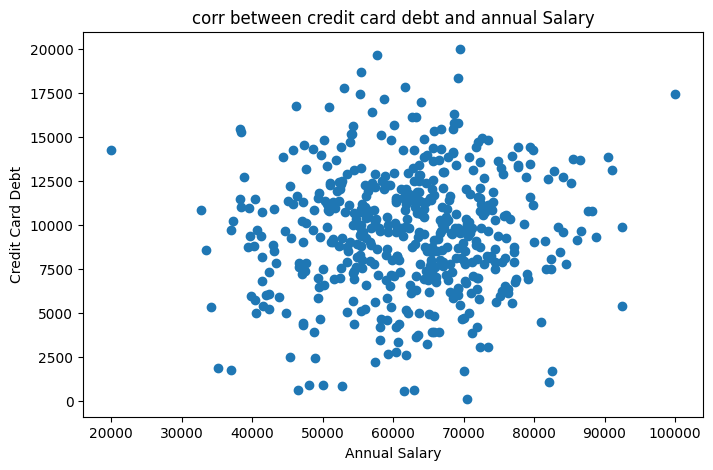

In [ ]:
# Correlation between 'credit card debt' and 'annual Salary'
plt.figure(figsize= (8,5))
plt.scatter(df['annual Salary'], df['credit card debt'])
plt.title('corr between credit card debt and annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Credit Card Debt')

In [ ]:
# The correlation between annual Salary and car purchase amount
fig = px.scatter(x= df['annual Salary'], y= df['car purchase amount'],
         title= 'correlation between annual Salary and car purchase amountcar purchase amount')
fig.update_layout(xaxis_title= 'Annual Salary', yaxis_title= 'Car Purchase Amount')
fig.show()

In [ ]:
# The correlation between annual salary and net worth
fig = px.histogram(df, x= 'annual Salary', y= 'net worth', title= 'correlation between annual salary and net worth',
                   color_discrete_sequence= ['#235E72'])
fig.update_layout(xaxis_title= 'Annual Salary', yaxis_title= 'Net Worth', bargap= 0.02, plot_bgcolor= 'white')
fig.show()

Correlation Heatmap

                       gender       age  annual Salary  credit card debt  \
gender               1.000000 -0.064481      -0.036499          0.024193   
age                 -0.064481  1.000000       0.000130          0.034721   
annual Salary       -0.036499  0.000130       1.000000          0.049599   
credit card debt     0.024193  0.034721       0.049599          1.000000   
net worth           -0.008395  0.020356       0.014767         -0.049378   
car purchase amount -0.066408  0.632865       0.617862          0.028882   

                     net worth  car purchase amount  
gender               -0.008395            -0.066408  
age                   0.020356             0.632865  
annual Salary         0.014767             0.617862  
credit card debt     -0.049378             0.028882  
net worth             1.000000             0.488580  
car purchase amount   0.488580             1.000000  


<Axes: >

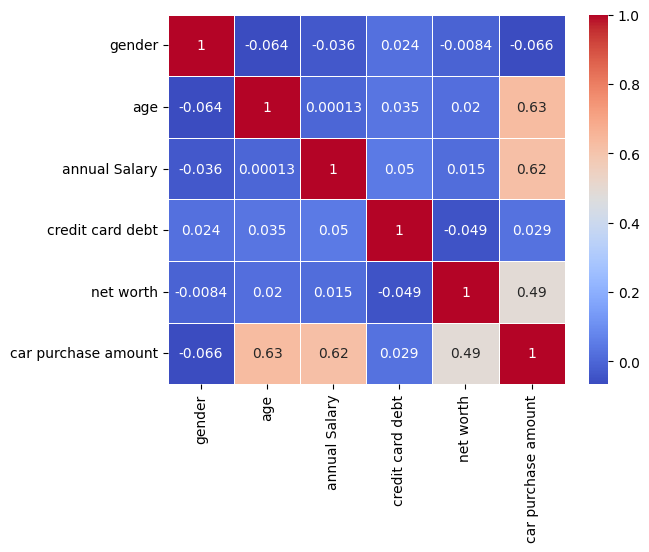

In [ ]:
# Correlation Matrix
corr_mtrx = df.corr()
print(corr_mtrx)

# Heatmap
sns.heatmap(corr_mtrx, annot= True, cmap= 'coolwarm', linewidths= 0.5)

Pairplot

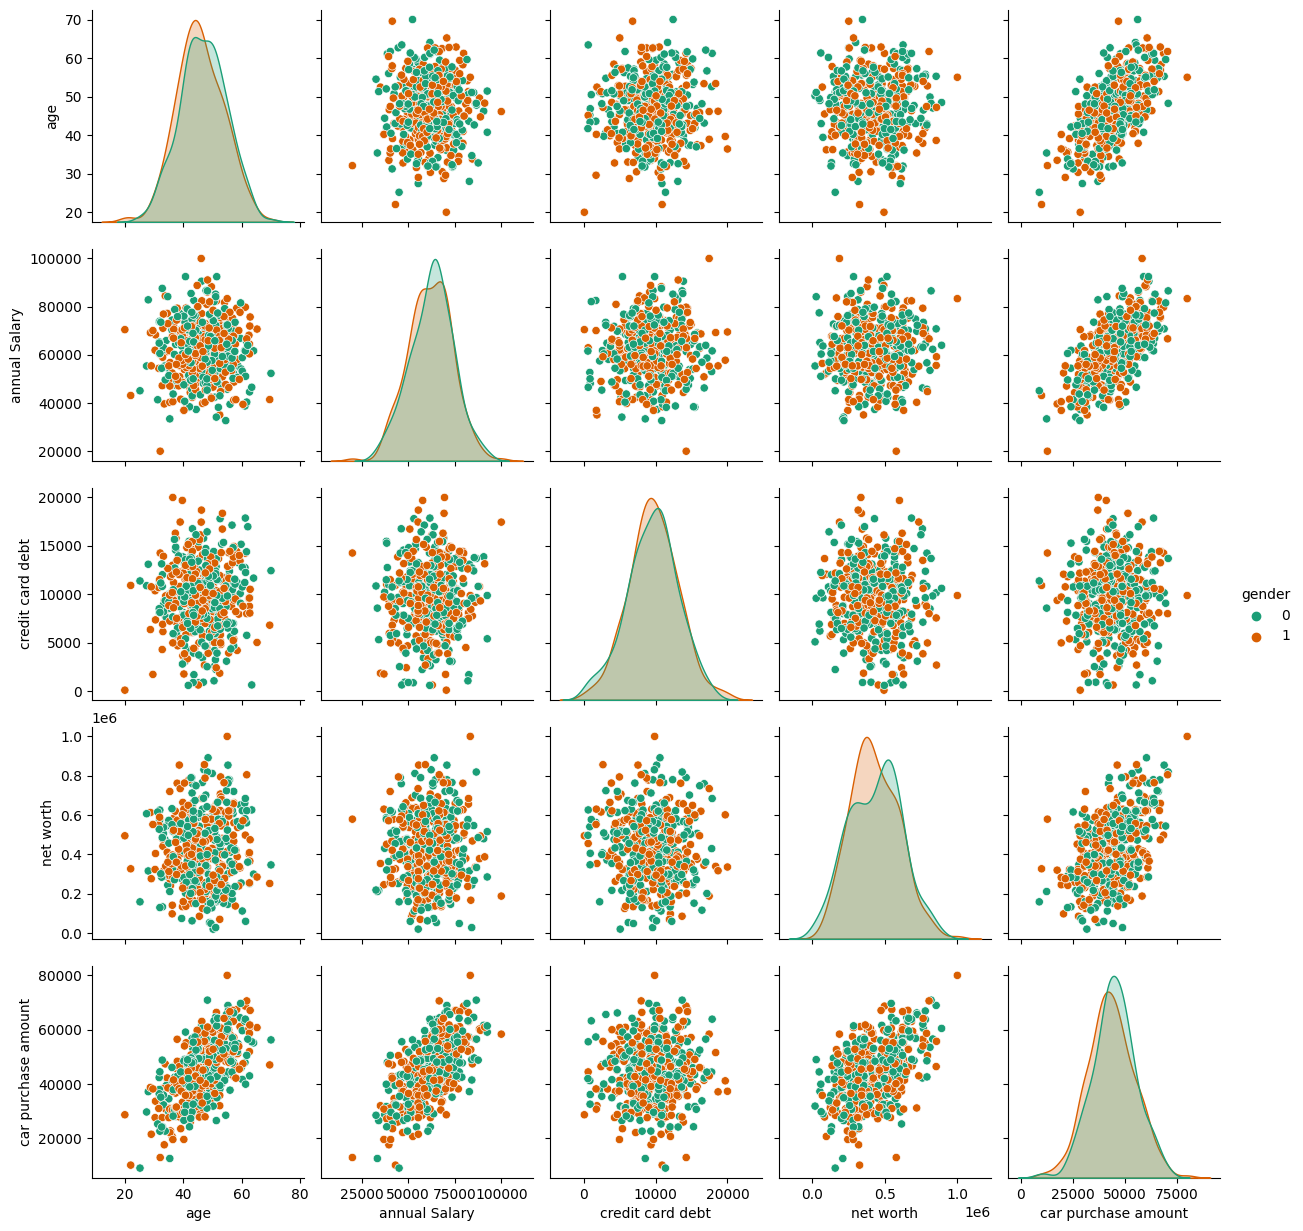

In [ ]:
# Pairplot
sns.pairplot(df, hue= 'gender', palette= 'Dark2')

# **Predictive Analysis**

In [5]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data Preprocessing

In [6]:
# Dropping non essential columns
df.drop(['customer name', 'customer e-mail', 'country', 'gender'], axis= 1, inplace= True)

In [7]:
# Select and define features(x) and target variable(y)
indep_variables = list(set(df.columns.tolist())- {'car purchase amount'})
x = df[indep_variables]

y = df['car purchase amount']
y = y.values.reshape(-1,1)

Feature Engineering

In [8]:
# Scaling & standardize the features # transforming
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

Data Spliting

In [9]:
# Splitting the dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, test_size= 0.2, shuffle= True, random_state= 42)

### Model Building

Building machine learning models and training them.

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(lr.score(x_train,y_train))

# Lasso Regression
las = Lasso(alpha= 0.0001)
las.fit(x_train, y_train)
las_pred = las.predict(x_test)
print(las.score(x_train, y_train))

# Ridge Regression
ridge = Ridge(alpha= 0.001)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
print(ridge.score(x_train, y_train))

# Decision Tree Regression
Decision_tree = DecisionTreeRegressor()
Decision_tree.fit(x_train, y_train)
Decision_tree_pred = Decision_tree.predict(x_test)
print(Decision_tree.score(x_train, y_train))

# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
print(random_forest.score(x_train, y_train))

0.9999999812450086
0.9999510748397793
0.9999999714074301
1.0
0.9920485410834123


### Model Evaluation

In [28]:
# Evaluating the performance of trained algorithms

print('1. The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, lr_pred))
print('R2 Score: ', r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('2. The performance evaluation of Lasso Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, las_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, las_pred))
print('R2 Score: ', r2_score(y_test, las_pred))
print('\n', '='*100, '\n')

print('3. The performance evaluation of Ridge Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, ridge_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, ridge_pred))
print('R2 Score: ', r2_score(y_test, ridge_pred))
print('\n', '='*100, '\n')

print('4. The performance evaluation of Decision Tree Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, Decision_tree_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, Decision_tree_pred))
print('R2 Score: ', r2_score(y_test, Decision_tree_pred))
print('\n', '='*100, '\n')

print('5. The performance evaluation of Random Forest Regression is below: ', '\n')
print('Mean squared error: ', mean_squared_error(y_test, random_forest_pred))
print('Mean absolute error: ', mean_absolute_error(y_test, random_forest_pred))
print('R2 Score: ', r2_score(y_test, random_forest_pred))

1. The performance evaluation of Linear Regression is below:  

Mean squared error:  4.1059400703557127e-10
Mean absolute error:  1.6198371057398742e-05
R2 Score:  0.9999999808303804


2. The performance evaluation of Lasso Regression is below:  

Mean squared error:  1.0599378048327307e-06
Mean absolute error:  0.000828271653804441
R2 Score:  0.9999505141231563


3. The performance evaluation of Ridge Regression is below:  

Mean squared error:  5.974304022979769e-10
Mean absolute error:  2.0330139468915377e-05
R2 Score:  0.9999999721074508


4. The performance evaluation of Decision Tree Regression is below:  

Mean squared error:  0.002548511539437676
Mean absolute error:  0.04064481475774648
R2 Score:  0.8810162939746949


5. The performance evaluation of Random Forest Regression is below:  

Mean squared error:  0.0010162476314924767
Mean absolute error:  0.021960259744154925
R2 Score:  0.9525539093846546


* The performance evaluation revealed that Linear Regression, Ridge Regression and Lasso Regression performed well than the Random Forest and Decision Tree in terms of, r2_score which is 0.9999

### Model Testing

In [26]:
# 'x' variables
df[indep_variables].head()

,net worth,annual Salary,credit card debt,age
0,238961.2505,62812.09301,11609.380910,41.851720
1,530973.9078,66646.89292,9572.957136,40.870623
2,638467.1773,53798.55112,11160.355060,43.152897
3,548599.0524,79370.03798,14426.164850,58.271369
4,560304.0671,59729.15130,5358.712177,57.313749


In [27]:
# 'y' variable
df['car purchase amount'].head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: car purchase amount, dtype: float64

In [30]:
# Creating a new DataFrame with values close to 3rd row as per above sample data
data = {'net worth': [638470], 'annual Salary': [53800], 'credit card debt': [11200], 'age': [44]}
df_testing = pd.DataFrame(data)
df_testing

,net worth,annual Salary,credit card debt,age
0,638470,53800,11200,44


In [32]:
# Predict car price with Linear Regression
print('Predicted car price with Linear Regression: ', lr.predict(df_testing), '\n')

# Predict car price with Lasso Regression
print('Predicted car price with Lasso Regression: ', las.predict(df_testing), '\n')

# Predict car price with Ridge Regression
print('Predicted car price with Ridge Regression: ', ridge.predict(df_testing), '\n')


Predicted car price with Linear Regression:  [[289536.47921659]] 

Predicted car price with Lasso Regression:  [287362.93331529] 

Predicted car price with Ridge Regression:  [[289513.86436743]] 

